# Energy data analysis

### This projects takes the energy information from BP statistical review

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information: the ones used for this project is:
##### Elec Gen by fue has the information of generation in TWh by fuels for the years 2017 and 2018
##### Renewables - TWh displays the renewable generation in TWh from 1965 til 2018
##### Solar Generation - TWh displays the solar generation in TWh from 1965 til 2018
##### Wind Generation - TWh displays the wind generation in TWh from 1965 til 2018
##### Geo Biomass Other - TWh displays the geo+biomass+other generation in TWh from 1965 til 2018
##### Carbon Dioxide Emissions displays the carbon emission in TWh from 1965 til 2018

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import folium
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

color=dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')


print('libraries imported')

libraries imported


In [2]:
#Import the excel file
test = pd.ExcelFile(r'bp-stats-review-2019-all-data.xls')

In [3]:
#Worksheet names
worksheet_names=test.sheet_names
print(worksheet_names)

['Contents', 'Primary Energy Consumption', 'Primary Energy - Cons by fuel', 'Primary Energy - Cons capita', 'Oil - Proved reserves', 'Oil - Proved reserves history', 'Oil Production - Barrels', 'Oil Production - Tonnes', 'Oil Production - Crude Conds', 'Oil Production - NGLs', 'Oil Consumption - Barrels', 'Oil Consumption - Tonnes', 'Oil Consumption - Mtoe', 'Oil - Regional Consumption ', 'Oil - Spot crude prices', 'Oil - Crude prices since 1861', 'Oil - Refinery throughput', 'Oil - Refining capacity', 'Oil - Regional refining margins', 'Oil - Trade movements', 'Oil - Inter-area movements ', 'Oil - Trade 2017 - 2018', 'Gas - Proved reserves', 'Gas - Proved reserves history ', 'Gas Production - Bcm', 'Gas Production - Bcf', 'Gas Production - Mtoe', 'Gas Consumption - Bcm', 'Gas Consumption - Bcf', 'Gas Consumption - Mtoe', 'Gas - Prices ', 'Gas - Inter-regional trade', 'Gas - LNG imports', 'Gas - LNG exports', 'Gas - Trade movts LNG', 'Gas - Trade movts - pipeline', 'Coal - Reserves', '

### Worksheet: Elec Gen by fue

In [4]:
file = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Elec Gen by fuel', headers = 2, skiprows=2, usecols = range(17)).dropna(axis=0,how='all').iloc[:-6]
file.fillna(0,inplace=True)
display(file)

,Terawatt-hours,Oil,Natural Gas,Coal,Nuclear energy,Hydro electric,Renew- ables,Other #,Total,Oil.1,Natural Gas.1,Coal.1,Nuclear energy.1,Hydro electric.1,Renew- ables.1,Other #.1,Total.1
1,Canada,3.212473,59.605269,60.131935,100.408995,396.502347,42.082832,0.787559,662.731411,3.165935,58.741767,59.260807,100.039205,387.250876,45.304938,0.586627,654.350156
2,Mexico,38.904020,196.320460,30.861010,10.882862,31.847656,19.130738,1.138609,329.085355,36.753647,196.653829,29.207574,13.588580,32.395115,21.352291,2.188988,332.140023
3,US,22.999955,1393.994292,1310.004561,847.315405,296.806675,417.757771,13.656467,4302.535126,26.421312,1578.508171,1245.789138,849.555536,288.706340,458.524325,13.266464,4460.771285
4,Total North America,65.116448,1649.920021,1400.997507,958.607262,725.156678,478.971341,15.582635,5294.351892,66.340894,1833.903767,1334.257519,963.183321,708.352331,525.181553,16.042079,5447.261464
6,Argentina,11.611393,80.795808,2.032082,6.088000,41.542979,3.011639,0.536554,145.618454,6.413229,85.274928,2.043583,6.872603,41.649455,3.817768,0.537842,146.609407
7,Brazil,15.478730,65.593316,25.766995,15.739196,370.906456,94.477756,0.000000,587.962450,11.528073,46.790545,21.901939,15.632193,387.686806,104.506970,0.000000,588.046527
8,Other S. & Cent. America,80.446343,97.950476,49.684963,0.000000,307.985855,41.876486,0.084910,578.029033,72.243140,95.812184,52.590103,0.000000,301.970252,47.993335,0.000008,570.609022
9,Total S. & Cent. America,107.536467,244.339599,77.484040,21.827196,720.435290,139.365881,0.621464,1311.609937,90.184442,227.877656,76.535624,22.504796,731.306513,156.318073,0.537850,1305.264955
11,Germany,5.569400,86.748300,241.930800,76.324400,20.150000,196.188000,26.743800,653.654700,5.200000,83.000000,229.000000,76.100000,16.900000,209.191000,29.309000,648.700000
12,Italy,11.526694,140.349300,35.128700,0.000000,34.372740,67.699000,6.753566,295.830000,10.865091,127.225967,36.572562,0.000000,45.852057,66.015445,4.081551,290.612673


In [5]:
#Taking only the countries
Countries = file[~file['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
display(Countries)

,Terawatt-hours,Oil,Natural Gas,Coal,Nuclear energy,Hydro electric,Renew- ables,Other #,Total,Oil.1,Natural Gas.1,Coal.1,Nuclear energy.1,Hydro electric.1,Renew- ables.1,Other #.1,Total.1
6,Argentina,11.611393,80.795808,2.032082,6.088000,41.542979,3.011639,0.536554,145.618454,6.413229,85.274928,2.043583,6.872603,41.649455,3.817768,0.537842,146.609407
38,Australia,5.309077,55.176279,159.133835,0.000000,13.534527,25.692364,0.184000,259.030082,5.258570,50.244877,156.562805,0.000000,17.267910,31.886929,0.184002,261.405093
7,Brazil,15.478730,65.593316,25.766995,15.739196,370.906456,94.477756,0.000000,587.962450,11.528073,46.790545,21.901939,15.632193,387.686806,104.506970,0.000000,588.046527
1,Canada,3.212473,59.605269,60.131935,100.408995,396.502347,42.082832,0.787559,662.731411,3.165935,58.741767,59.260807,100.039205,387.250876,45.304938,0.586627,654.350156
39,China,10.745000,202.800000,4445.497263,248.100000,1165.070000,492.397146,39.840591,6604.450000,10.745000,223.600000,4732.447893,294.360000,1202.430000,634.223462,13.963646,7111.770000
33,Egypt,27.700280,149.391363,0.000000,0.000000,13.407400,2.712121,0.000000,193.211164,22.125146,160.901120,0.000000,0.000000,13.483380,3.474706,0.000000,199.984352
11,Germany,5.569400,86.748300,241.930800,76.324400,20.150000,196.188000,26.743800,653.654700,5.200000,83.000000,229.000000,76.100000,16.900000,209.191000,29.309000,648.700000
40,India,10.072794,73.457183,1117.612719,37.414450,135.668322,95.766950,0.344995,1470.337414,10.102200,74.307658,1176.262706,39.050700,139.667832,121.502260,0.206820,1561.100176
41,Indonesia,18.929900,55.708000,147.964000,0.000000,18.632000,13.383450,0.000000,254.617350,20.197329,59.580000,156.355311,0.000000,16.411200,14.753160,0.000000,267.297000
27,Iran,28.872766,251.170340,0.486667,7.073567,17.232000,0.328661,0.000000,305.164000,23.023168,269.102306,0.486667,7.000133,10.770000,0.421413,0.000000,310.803686


In [6]:
#Taking only the Totals
Total_Countries = file[file['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Total_Countries.set_index('Terawatt-hours', inplace=True)
Total_Countries.drop('Total World', inplace=True)
display(Total_Countries)

,Oil,Natural Gas,Coal,Nuclear energy,Hydro electric,Renew- ables,Other #,Total,Oil.1,Natural Gas.1,Coal.1,Nuclear energy.1,Hydro electric.1,Renew- ables.1,Other #.1,Total.1
Terawatt-hours,,,,,,,,,,,,,,,,
Total Africa,83.814559,324.892728,248.782115,15.756337,124.578163,26.898306,4.910606,829.632814,77.579033,339.339711,255.922090,11.090427,132.840769,31.876051,5.060129,853.708211
Total Asia Pacific,215.085518,1442.083570,6916.201027,493.829718,1649.447194,796.582224,65.001728,11578.230981,188.047603,1485.763431,7290.814753,553.584622,1718.508325,995.979526,40.882019,12273.580279
Total CIS,14.402846,663.155470,251.432137,205.765170,240.148242,2.046501,4.738545,1381.688911,13.656145,686.084641,258.978918,206.577070,244.839096,2.537561,4.685305,1417.358736
Total Europe,61.933607,787.484258,888.504351,936.122945,584.889494,717.074390,85.783584,4061.792630,56.042823,731.317358,862.735194,937.491630,642.066617,761.054040,86.553290,4077.260951
Total Middle East,322.136425,840.953364,22.750905,7.073567,20.788066,5.544428,0.043381,1219.290136,310.921283,878.465192,21.283906,7.000133,15.190500,7.442850,0.060833,1240.364698
Total North America,65.116448,1649.920021,1400.997507,958.607262,725.156678,478.971341,15.582635,5294.351892,66.340894,1833.903767,1334.257519,963.183321,708.352331,525.181553,16.042079,5447.261464
Total S. & Cent. America,107.536467,244.339599,77.484040,21.827196,720.435290,139.365881,0.621464,1311.609937,90.184442,227.877656,76.535624,22.504796,731.306513,156.318073,0.537850,1305.264955


### Worksheet: Renewables - TWh

In [7]:
Renew = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Renewables - TWh', headers = 2, skiprows=2, usecols = range(55)).dropna(axis=0,how='all').iloc[:-10]
Renew.fillna(0,inplace=True)
display(Renew)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.625644,19.188392,20.972879,23.105114,30.496379,33.804308,37.397201,41.887821,42.082832,45.304938
2,Mexico,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161000,...,8.170422,8.716161,9.056246,10.518245,11.612805,13.783831,16.432147,17.958811,19.130738,21.352291
3,US,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,19.989692,...,149.868278,173.683212,201.904567,228.317260,266.240323,296.776575,315.807526,367.428184,417.757771,458.524325
4,Total North America,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,20.150692,...,173.664345,201.587765,231.933692,261.940619,308.349507,344.364714,369.636874,427.274816,478.971341,525.181553
6,Argentina,0.000000,0.000000,0.000000,0.000000,0.000000,0.047541,0.049865,0.064353,0.049042,...,1.765664,2.038692,2.218410,2.831857,2.925779,2.937460,2.986277,2.525041,3.011639,3.817768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Thailand,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.296292,3.426215,4.076664,5.211190,7.233910,9.045505,10.041485,12.537202,14.944018,17.800317
103,Vietnam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.073600,0.095700,0.096700,0.097700,0.126900,0.131900,0.240700,0.277800,0.334490,0.467729
104,Other Asia Pacific,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.132146,0.159135,0.181995,0.241326,0.319209,0.503730,0.629444,0.702202,0.942199,1.245919
105,Total Asia Pacific,1.644000,1.643000,1.424000,1.577000,1.608000,1.776704,1.754611,1.785591,1.834998,...,147.573961,181.513905,226.777679,272.623953,349.959489,417.829505,503.904272,621.642302,796.582224,995.979526


In [8]:
#Taking only the countries
Countries_Renew = Renew[~Renew['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Countries_Renew.set_index('Terawatt-hours', inplace=True)
display(Countries_Renew)    

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Algeria,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009100,0.018119,0.026723,0.028600,0.061000,0.077000,0.264052,0.523000,0.613000
Argentina,0.000,0.000,0.00,0.000,0.000,0.047541,0.049865,0.064353,0.049042,0.050068,...,1.765664,2.038692,2.218410,2.831857,2.925779,2.937460,2.986277,2.525041,3.011639,3.817768
Australia,0.296,0.284,0.29,0.282,0.281,0.261000,0.263000,0.280000,0.338000,0.429000,...,7.514792,8.404198,11.050497,13.234850,16.438050,18.275362,21.451472,24.148992,25.692364,31.886929
Austria,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.280937,6.616157,6.627058,7.407549,8.363487,8.967310,10.280988,11.019592,12.484402,12.241908
Azerbaijan,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002100,0.000500,0.000000,0.000000,0.068600,0.092200,0.100100,0.145350,0.144450,0.202560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.015919,22.588890,29.520426,35.938880,48.512304,58.634553,77.067607,77.737604,93.401700,105.624137
Uzbekistan,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Venezuela,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.010045,0.010036,0.010008,0.010008


In [9]:
#Taking only the Totals
Total_Renew = Renew[Renew['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Total_Renew.set_index('Terawatt-hours', inplace=True)
Total_Renew.drop('Total World', inplace=True)
display(Total_Renew)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Total Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164000,0.165000,0.170000,0.175000,...,5.221474,6.296553,6.889568,7.566073,8.770665,12.486973,19.523279,23.391996,26.898306,31.876051
Total Asia Pacific,1.644000,1.643000,1.424000,1.577000,1.608000,1.776704,1.754611,1.785591,1.834998,2.496269,...,147.573961,181.513905,226.777679,272.623953,349.959489,417.829505,503.904272,621.642302,796.582224,995.979526
Total CIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.568607,0.630940,0.666570,0.622303,0.673993,1.036842,1.418238,1.796743,2.046501,2.537561
Total Europe,3.009000,4.101000,4.489000,4.997000,5.422904,7.118357,7.231884,7.122608,7.663391,8.042060,...,270.362631,313.637391,379.573587,448.736512,506.805474,547.157076,625.303758,638.562014,717.074390,761.054040
Total Middle East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.336000,0.400339,0.671083,0.865934,1.177515,1.948002,2.979105,4.462767,5.544428,7.442850
Total North America,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,20.150692,20.867265,...,173.664345,201.587765,231.933692,261.940619,308.349507,344.364714,369.636874,427.274816,478.971341,525.181553
Total S. & Cent. America,0.000000,0.000000,0.000000,0.000000,0.000000,0.562232,2.144260,2.130923,2.265843,2.378219,...,38.600558,50.082221,53.218531,63.068093,72.684323,87.278012,105.824443,124.744374,139.365881,156.318073


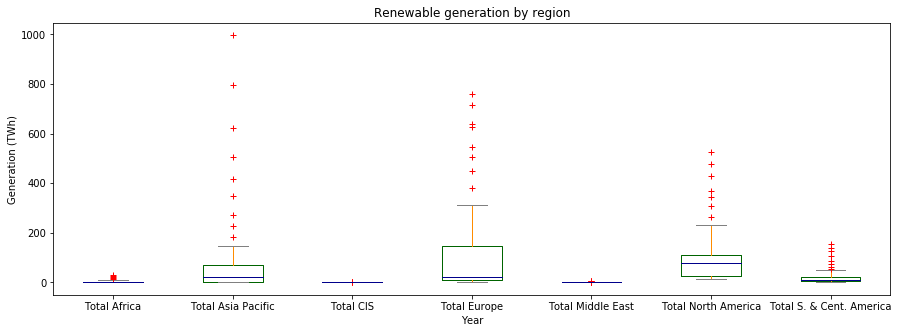

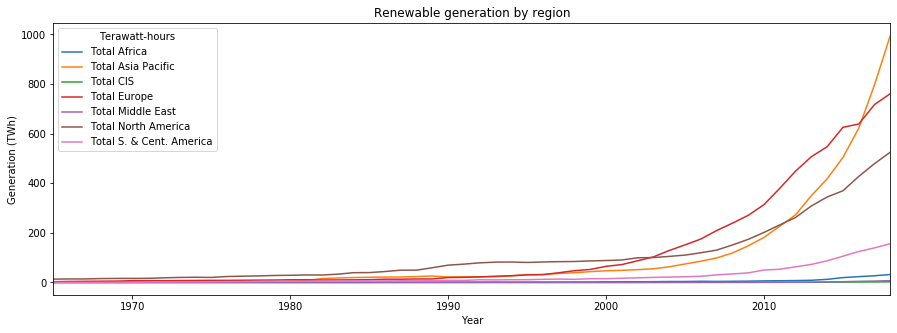

In [10]:
#Plot line chart with the Renew generation by region
df=Total_Renew.transpose()
df.plot(kind='box', figsize=(15,5), color=color, sym='r+')
plt.title('Renewable generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

df.plot(kind='line', figsize=(15,5))
plt.title('Renewable generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

The region is: Total Africa
0


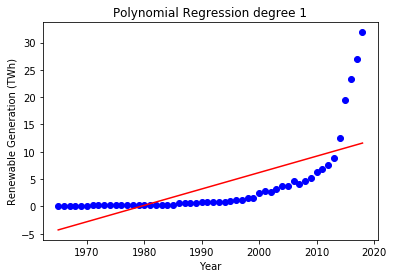

[[11.89419775]]
[[12.19429646]]


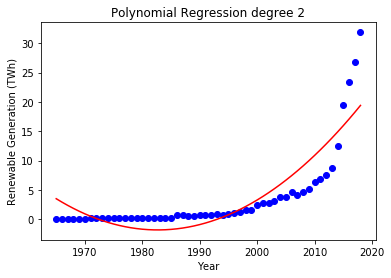

[[20.63184913]]
[[21.88514618]]


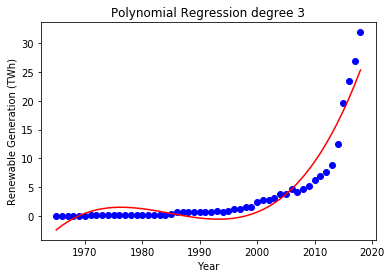

[[28.03134566]]
[[30.89904472]]
The region is: Total Asia Pacific
1


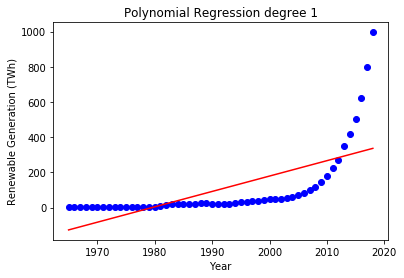

[[345.30987769]]
[[354.04927258]]


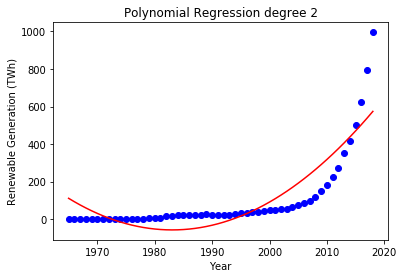

[[610.80040373]]
[[648.50240146]]


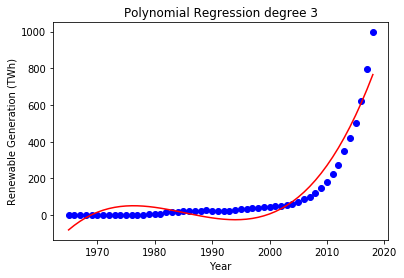

[[849.77926442]]
[[939.62336496]]
The region is: Total CIS
2


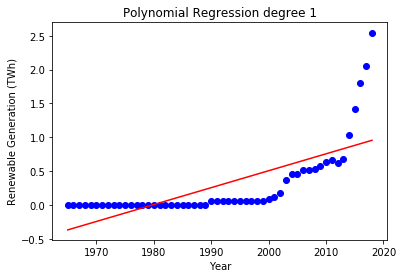

[[0.9801712]]
[[1.00515667]]


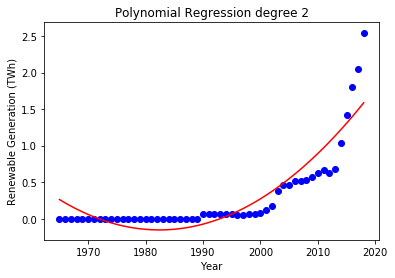

[[1.68524689]]
[[1.78714972]]


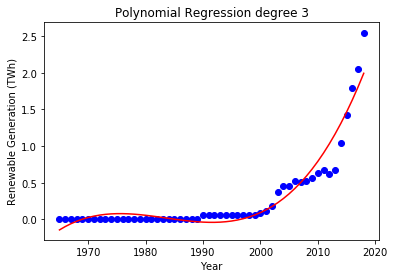

[[2.19169983]]
[[2.4041088]]
The region is: Total Europe
3


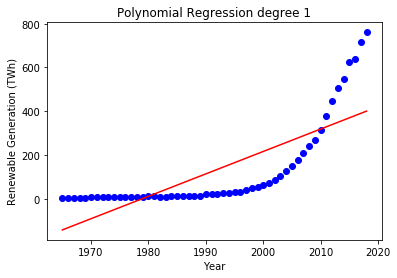

[[410.93947065]]
[[421.18513697]]


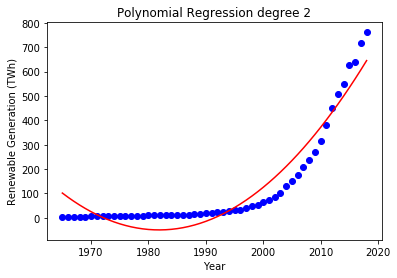

[[683.78266415]]
[[723.79304248]]


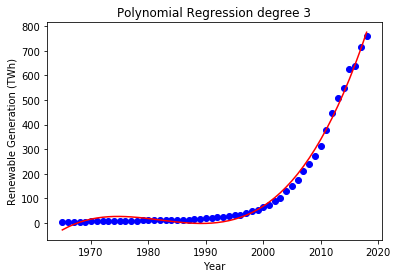

[[846.67709151]]
[[922.22855726]]
The region is: Total Middle East
4


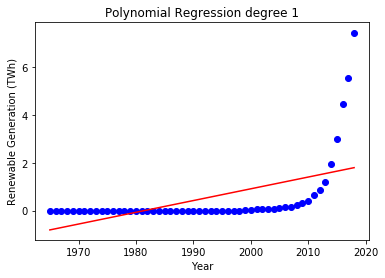

[[1.84589169]]
[[1.89498828]]


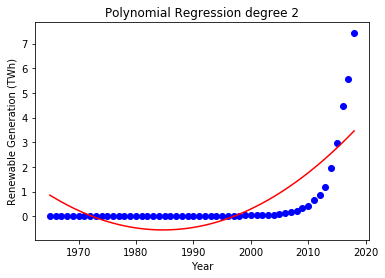

[[3.70537922]]
[[3.95732899]]


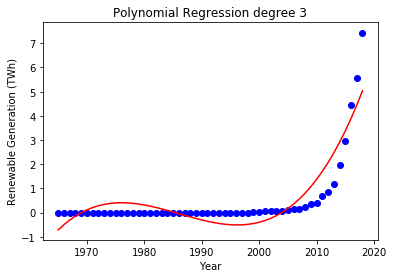

[[5.6714047]]
[[6.35232382]]
The region is: Total North America
5


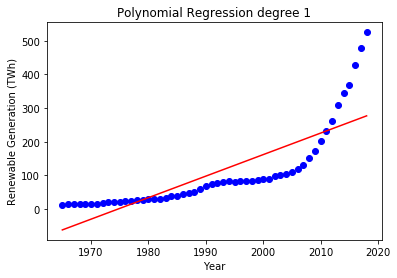

[[283.39987979]]
[[289.78901612]]


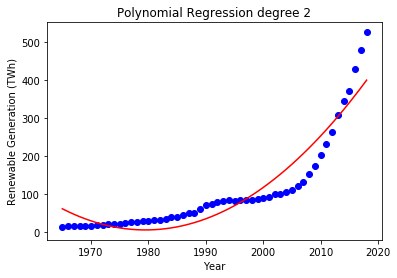

[[419.80152201]]
[[441.07083748]]


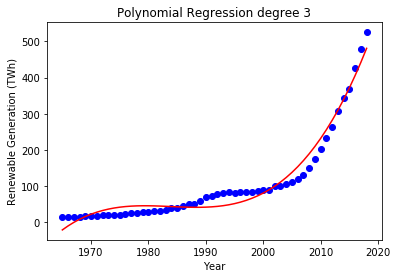

[[521.74927317]]
[[565.26243921]]
The region is: Total S. & Cent. America
6


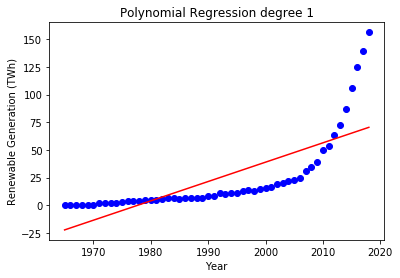

[[72.13878201]]
[[73.88831755]]


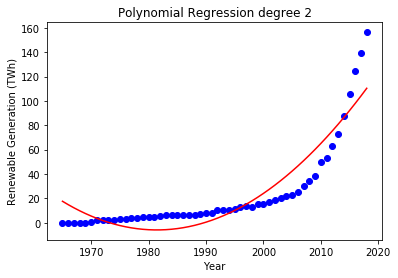

[[116.79054283]]
[[123.41117955]]


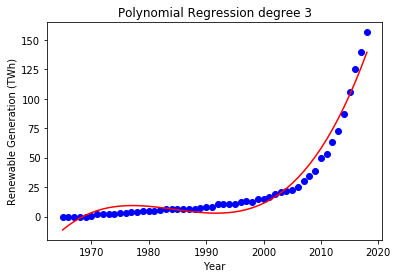

[[152.91873798]]
[[167.42223405]]


In [11]:
#build the Linear plot regression by region
n=0
for j in df.columns:
    print('The region is: '+j)
    print(n)
    for i in range(1,4):
        #import the dataset
        x=df.index.values.reshape(-1,1)
        y=df.iloc[:,int(n)].values.reshape(-1,1)
        
        #Fit the linear regression
        lin=LinearRegression()
        lin.fit(x,y)
        
        #Fit the Poly regression
        poly = PolynomialFeatures(degree = i)
        x_poly = poly.fit_transform(x)
        poly.fit(x_poly,y)
        lin2=LinearRegression()
        lin2.fit(x_poly,y)
        
        #Plot Poly regression
        plt.scatter(x,y,color='blue')
        plt.plot(x,lin2.predict(poly.fit_transform(x)),color='red')
        plt.title('Polynomial Regression degree '+str(i))
        plt.xlabel('Year')
        plt.ylabel('Renewable Generation (TWh)')
        plt.show()
        print(lin2.predict(poly.fit_transform([[2019]])))
        print(lin2.predict(poly.fit_transform([[2020]])))
    n=n+1


### Worksheet: Solar Generation - TWh

In [12]:
Solar_Gen = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', headers = 2, skiprows=2, usecols = range(55)).dropna(axis=0,how='all').iloc[:-10]
Solar_Gen.fillna('0',inplace=True)
display(Solar_Gen)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,0,0,0,0,0,0,0,0,0,...,0.1093,0.2542,0.5716,0.881,1.4988,2.1198,2.895,3.03131,3.2922,3.54625
2,Mexico,0,0,0,0,0,0,0,0,0,...,0.027,0.031,0.041,0.069,0.106,0.221,0.246,0.252276,1.18651,2.2428
3,US,0,0,0,0,0,0,0,0,0,...,2.07596,3.01304,4.7389,9.03701,16.0397,29.2162,39.4263,55.4202,78.0566,97.1182
4,Total North America,0,0,0,0,0,0,0,0,0,...,2.21226,3.29824,5.3515,9.98701,17.6445,31.557,42.5673,58.7038,82.5353,102.907
6,Argentina,0,0,0,0,0,0,0,0,0,...,7.6084e-05,8.589e-05,0.001614,0.00817297,0.0150741,0.015944,0.014683,0.014273,0.016417,0.108129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Thailand,0,0,0,0,0,0,0,0,0,...,0.0444,0.0583,0.0944,0.4985,1.2575,1.9335,2.378,3.377,4.48086,4.71966
103,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.004,0.004,0.007,0.00888193,0.0802315
104,Other Asia Pacific,0,0,0,0,0,0,0,0,0,...,0.029502,0.0335752,0.0440142,0.0949959,0.112544,0.164956,0.222921,0.321929,0.477048,0.585724
105,Total Asia Pacific,0,0,0,0,0,0,0,0,0,...,4.3835,6.73875,12.1544,17.583,32.3389,62.8747,99.1937,141.755,227.197,314.209


In [13]:
#Taking only the countries
Countries_Solar_Gen = Solar_Gen[~Solar_Gen['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Countries_Solar_Gen.set_index('Terawatt-hours', inplace=True)
display(Countries_Solar_Gen)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0.0091,0.0181187,0.026723,0.0286,0.06,0.058,0.245,0.504,0.603
Argentina,0,0,0,0,0,0,0,0,0,0,...,7.6084e-05,8.589e-05,0.001614,0.00817297,0.0150741,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0,0,0,0,0,0,0,0,0,0,...,0.290242,0.977648,2.04455,2.412,3.8474,4.952,5.958,7.47459,8.95511,12.0811
Austria,0,0,0,0,0,0,0,0,0,0,...,0.0489143,0.0888131,0.17407,0.337483,0.625974,0.785246,0.937098,1.09602,1.26897,1.57864
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0008,0.0029,0.0046,0.0353,0.0372,0.03926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,0.0200002,0.0402771,0.243663,1.35376,2.01026,4.05406,7.53341,10.4109,11.5249,12.9218
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0.00246,0.00298,0.00522,0.00534732,0.0067478,0.00878488,0.0100355,0.0100081,0.0100081


In [14]:
#Taking only the Totals
Total_Solar_Gen = Solar_Gen[Solar_Gen['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Total_Solar_Gen.set_index('Terawatt-hours', inplace=True)
Total_Solar_Gen.drop('Total World', inplace=True)
display(Total_Solar_Gen)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Total Africa,0,0,0,0,0,0,0,0,0,0,...,0.10787,0.223865,0.46053,0.553427,0.824283,1.82626,3.56828,4.91132,6.61057,9.02909
Total Asia Pacific,0,0,0,0,0,0,0,0,0,0,...,4.3835,6.73875,12.1544,17.583,32.3389,62.8747,99.1937,141.755,227.197,314.209
Total CIS,0,0,0,0,0,0,0,0,0,0,...,7.375e-06,0.000240125,0.00182275,0.00633776,0.0188439,0.177377,0.41104,0.63575,0.767299,0.8813
Total Europe,0,0,0,0,0,0,0,0,0,0,...,14.1928,23.2634,46.7135,71.8696,86.9351,98.8325,109.88,113.95,124.542,139.052
Total Middle East,0,0,0,0,0,0,0,0,0,0,...,0.0448,0.0979385,0.227483,0.429934,0.766215,1.4992,2.388,3.45574,4.40989,6.12115
Total North America,0,0,0,0,0,0,0,0,0,0,...,2.21226,3.29824,5.3515,9.98701,17.6445,31.557,42.5673,58.7038,82.5353,102.907
Total S. & Cent. America,0,0,0,0,0,0,0,0,0,0,...,0.0237607,0.0607369,0.12664,0.335077,0.53074,1.14346,2.73073,4.9658,7.45561,12.4315


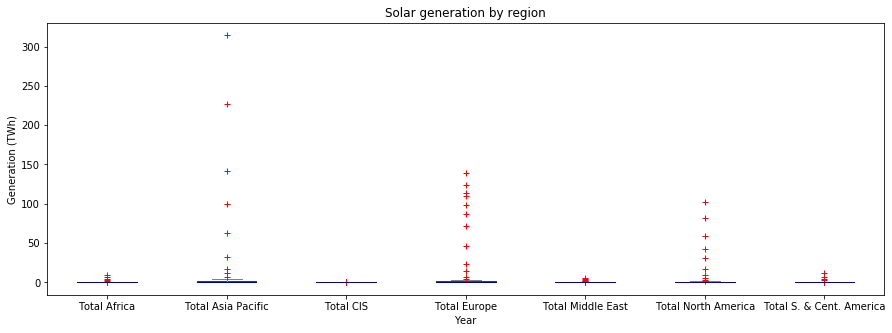

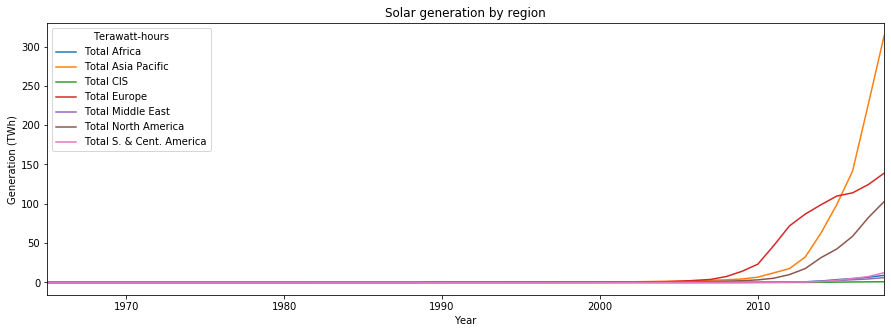

In [15]:
#Plot line chart with the Renew generation by region
df = Total_Solar_Gen.transpose()
df.plot(kind='box', figsize=(15,5), color=color, sym='r+')
plt.title('Solar generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

df.plot(kind='line', figsize=(15,5))
plt.title('Solar generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

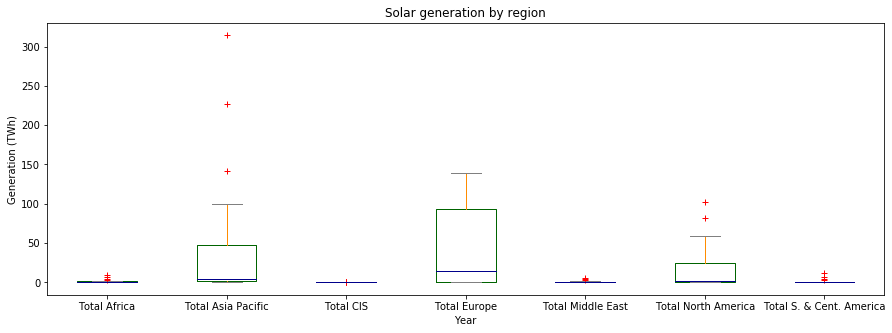

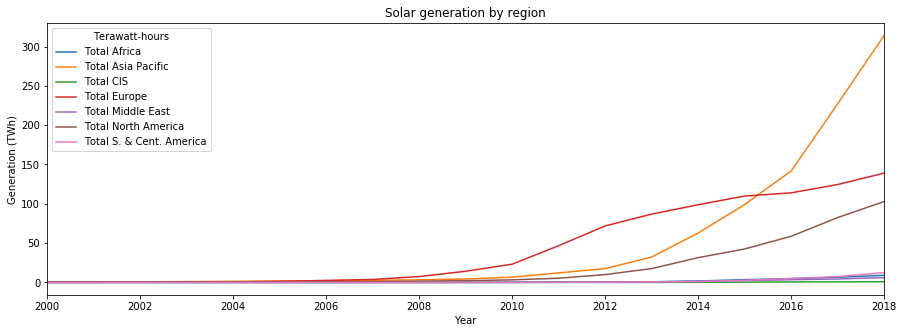

In [16]:
#Taking only the Totals from 2000
Total_Solar_Gen_2000 = Total_Solar_Gen.iloc[:,35:]
df=Total_Solar_Gen_2000.transpose()

#Plot line chart with the Renew generation by region
df.plot(kind='box', figsize=(15,5),color=color,sym='r+')
plt.title('Solar generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

df.plot(kind='line', figsize=(15,5))
plt.title('Solar generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

### Worksheet: Wind Generation - TWh

In [17]:
Wind_Gen = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Wind Generation - TWh ', headers = 2, skiprows=2, usecols = range(55)).dropna(axis=0,how='all').iloc[:-10]
Wind_Gen.fillna(0,inplace=True)
display(Wind_Gen)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.575235,8.636950,10.187600,11.310400,17.962600,22.538000,26.966391,29.179033,29.066107,32.170052
2,Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.596353,1.239111,1.648321,3.688310,4.184544,6.426197,8.745095,10.378095,10.619782,12.629207
3,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.632457,95.608329,121.390504,142.244144,169.535096,183.490184,192.644998,229.285416,256.871376,277.729106
4,Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.804044,105.484390,133.226425,157.242855,191.682240,212.454381,228.356484,268.842544,296.557264,322.528364
6,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036832,0.025352,0.026591,0.369862,0.453355,0.619491,0.593335,0.547359,0.611567,1.412700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001000,0.003900,0.005000,0.017200,0.351300,0.305100,0.312600,0.345000,0.526975,0.764159
103,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011600,0.040700,0.040700,0.040700,0.068900,0.068900,0.176700,0.209800,0.264775,0.326664
104,Other Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057158,0.071940,0.068974,0.070883,0.123002,0.237676,0.278184,0.248753,0.314518,0.497065
105,Total Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.842589,76.721271,109.802787,140.728532,191.519400,210.682543,243.162155,307.258478,376.740027,460.469456


In [18]:
#Taking only the countries
Countries_Wind_Gen = Wind_Gen[~Wind_Gen['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Countries_Wind_Gen
display(Countries_Wind_Gen)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
76,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.019000,0.019052,0.019000,0.010000
6,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036832,0.025352,0.026591,0.369862,0.453355,0.619491,0.593335,0.547359,0.611567,1.412700
87,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.437750,4.985000,6.432000,7.725000,9.259000,9.777000,11.802000,13.026391,13.193930,16.266484
19,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.954040,2.063914,1.936236,2.462029,3.153232,3.845768,4.840343,5.232349,6.574499,5.900015
55,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002100,0.000500,0.000000,0.000000,0.000800,0.002300,0.004600,0.022800,0.022100,0.082200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.280972,10.285645,15.962969,19.847120,28.397152,31.959245,40.275217,37.262702,50.003657,57.115720
61,Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001260,0.000000,0.000000,0.000000
103,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011600,0.040700,0.040700,0.040700,0.068900,0.068900,0.176700,0.209800,0.264775,0.326664


In [19]:
#Taking only the Totals
Total_Wind_Gen = Wind_Gen[Wind_Gen['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Total_Wind_Gen.set_index('Terawatt-hours', inplace=True)
Total_Wind_Gen.drop('Total World', inplace=True)
display(Total_Wind_Gen)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Total Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.589882,2.284146,2.537476,2.961696,3.559756,5.157168,8.887082,11.304700,12.795909,14.685940
Total Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.842589,76.721271,109.802787,140.728532,191.519400,210.682543,243.162155,307.258478,376.740027,460.469456
Total CIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011200,0.009786,0.012539,0.018116,0.021122,0.126065,0.325622,0.517983,0.597511,0.977083
Total Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,135.383229,153.443497,186.656903,214.837220,248.094312,264.813331,318.807054,323.029198,384.296382,404.369480
Total Middle East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.240500,0.222200,0.225800,0.216600,0.228100,0.215800,0.381800,0.746328,0.873228,1.060386
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.804044,105.484390,133.226425,157.242855,191.682240,212.454381,228.356484,268.842544,296.557264,322.528364
Total S. & Cent. America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.077850,3.449188,4.324478,7.804379,10.197256,18.582410,31.464310,45.174311,56.129266,65.862666


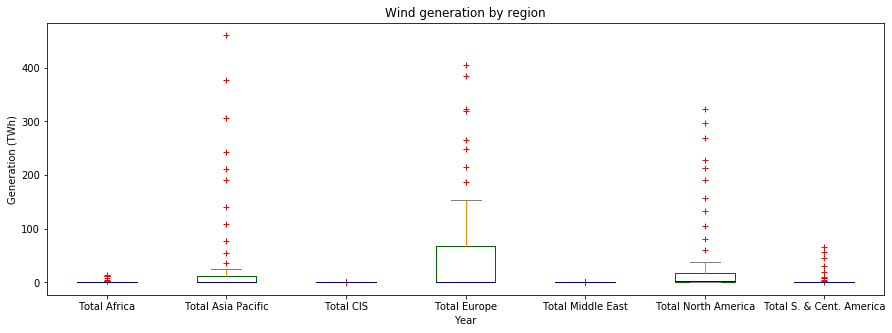

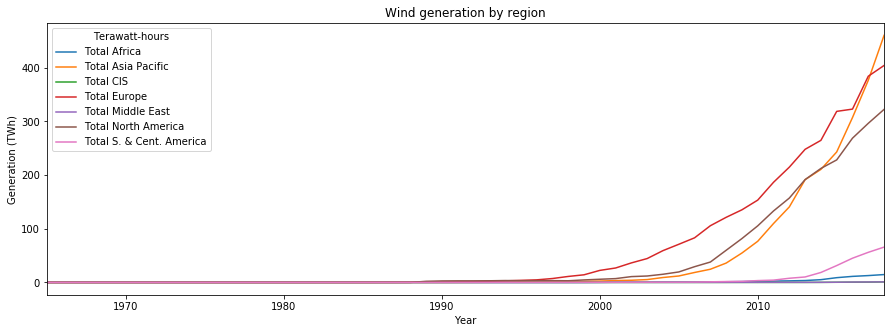

In [20]:
#Plot line chart with the Renew generation by region
df=Total_Wind_Gen.transpose()
df.plot(kind='box', figsize=(15,5), color=color, sym='r+')
plt.title('Wind generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()


df.plot(kind='line', figsize=(15,5))
plt.title('Wind generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

### Worksheet: Geo Biomass Other - TWh

In [21]:
Other = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Geo Biomass Other - TWh', headers = 2, skiprows = 2, usecols = range(55)).dropna(axis=0,how='all').iloc[:-10]
Other.fillna(0, inplace=True)
display(Other)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.941109,10.297242,10.213679,10.913714,11.034979,9.146508,7.535811,9.677474,9.724526,9.588636
2,Mexico,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161000,...,7.547069,7.446050,7.366924,6.760935,7.322261,7.136634,7.441052,7.328440,7.324450,6.480284
3,US,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,19.989692,...,73.159861,75.061846,75.775159,77.036102,80.665532,84.070229,83.736265,82.722566,82.829829,83.677037
4,Total North America,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,20.150692,...,89.648040,92.805138,93.355762,94.710751,99.022771,100.353372,98.713128,99.728480,99.878806,99.745956
6,Argentina,0.000000,0.000000,0.000000,0.000000,0.000000,0.047541,0.049865,0.064353,0.049042,...,1.728756,2.013255,2.190206,2.453822,2.457350,2.302025,2.378259,1.963409,2.383655,2.296939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Thailand,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.250892,3.364015,3.977264,4.695490,5.625110,6.806905,7.350885,8.815202,9.936180,12.316502
103,Vietnam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062000,0.055000,0.056000,0.057000,0.058000,0.059000,0.060000,0.061000,0.060833,0.060833
104,Other Asia Pacific,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045486,0.053620,0.069007,0.075447,0.083664,0.101098,0.128339,0.131520,0.150633,0.163131
105,Total Asia Pacific,1.644000,1.643000,1.424000,1.577000,1.608000,1.776704,1.754611,1.785591,1.834998,...,88.347874,98.053886,104.820493,114.312393,126.101182,144.272213,161.548391,172.628595,192.645560,221.301517


In [22]:
#Taking only the countries
Countries_Other = Other[~Other['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Countries_Other.set_index('Terawatt-hours',inplace=True)
display(Countries_Other)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Algeria,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000,0.000,0.00,0.000,0.000,0.047541,0.049865,0.064353,0.049042,0.050068,...,1.728756,2.013255,2.190206,2.453822,2.457350,2.302025,2.378259,1.963409,2.383655,2.296939
Australia,0.296,0.284,0.29,0.282,0.281,0.261000,0.263000,0.280000,0.338000,0.429000,...,2.786800,2.441550,2.573950,3.097850,3.331650,3.546362,3.691472,3.648006,3.543324,3.539346
Austria,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.277982,4.463430,4.516752,4.608037,4.584282,4.336296,4.503547,4.691227,4.640932,4.763252
Azerbaijan,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.067000,0.087000,0.090900,0.087250,0.085150,0.081100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.714948,12.262968,13.313794,14.737997,18.104890,22.621246,29.258976,30.063955,31.873173,35.586602
Uzbekistan,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Venezuela,0.000,0.000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
#Taking only the Totals
Total_Other = Other[Other['Terawatt-hours'].str.startswith('Total')].sort_values(['Terawatt-hours'])
Total_Other.set_index('Terawatt-hours',inplace=True)
Total_Other.drop('Total World')
display(Total_Other)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Total Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164000,0.165000,0.170000,0.175000,...,3.523722,3.788542,3.891562,4.050950,4.386626,5.503550,7.067920,7.175975,7.491825,8.161023
Total Asia Pacific,1.644000,1.643000,1.424000,1.577000,1.608000,1.776704,1.754611,1.785591,1.834998,2.496269,...,88.347874,98.053886,104.820493,114.312393,126.101182,144.272213,161.548391,172.628595,192.645560,221.301517
Total CIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.557400,0.620914,0.652208,0.597849,0.634027,0.733400,0.681576,0.643010,0.681690,0.679178
Total Europe,3.009000,4.101000,4.489000,4.997000,5.422904,7.118357,7.231884,7.122608,7.663391,8.042060,...,120.786575,136.930502,146.203202,162.029678,171.776075,183.511239,196.616529,201.582338,208.235630,217.632497
Total Middle East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050700,0.080200,0.217800,0.219400,0.183200,0.233000,0.209300,0.260700,0.261310,0.261310
Total North America,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,20.150692,20.867265,...,89.648040,92.805138,93.355762,94.710751,99.022771,100.353372,98.713128,99.728480,99.878806,99.745956
Total S. & Cent. America,0.000000,0.000000,0.000000,0.000000,0.000000,0.562232,2.144260,2.130923,2.265843,2.378219,...,36.498948,46.572297,48.767413,54.928637,61.956328,67.552146,71.629400,74.604258,75.781005,78.023880
Total World,17.985232,19.806007,19.986571,22.120045,23.257964,25.693196,27.879168,29.877101,32.084924,33.958814,...,339.413259,378.851479,397.908439,430.849657,464.060209,502.158919,536.466244,556.623356,584.975827,625.805362


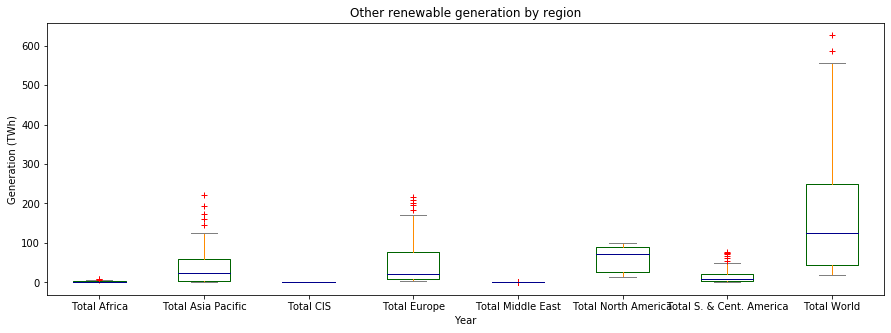

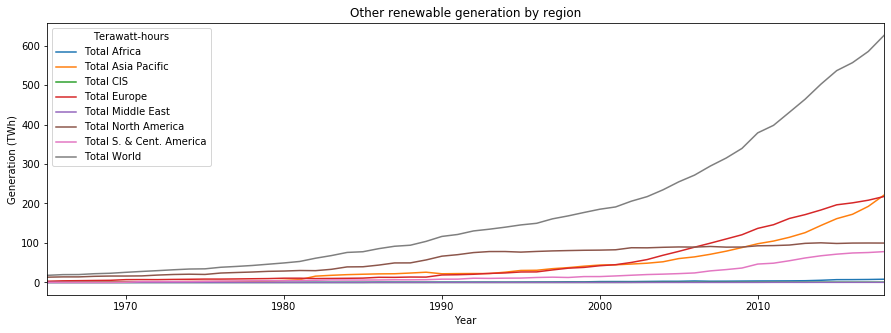

In [24]:
#Plot line chart with the Renew generation by region
df=Total_Other.transpose()

df.plot(kind='box', figsize=(15,5), color=color, sym='r+')
plt.title('Other renewable generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

df.plot(kind='line', figsize=(15,5))
plt.title('Other renewable generation by region')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()

### Worksheet: Carbon Dioxide Emissions

In [25]:
Carbon = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Carbon Dioxide Emissions', headers = 2, skiprows = 2, usecols = range(55)).dropna(axis=0,how='all').iloc[:-11]
Carbon.fillna(0, inplace=True)
display(Carbon)

,Million tonnes of carbon dioxide,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
2,Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,...,433.023325,442.415847,465.416188,473.698587,472.509510,459.159973,462.968167,468.539460,476.846262,462.477817
3,US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
4,Total North America,3802.064021,4011.580252,4124.166130,4373.664194,4568.442077,4726.128891,4780.909564,5031.405347,5258.229048,...,6199.175066,6434.733952,6360.138723,6133.960875,6274.900958,6310.862789,6161.228709,6058.156832,6040.739115,6157.935105
6,Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Thailand,7.366886,8.743907,9.900674,12.985647,14.063613,16.258676,17.899369,22.296594,23.616328,...,236.482144,248.709463,253.541608,270.885714,273.874319,280.694394,289.365002,295.454205,299.890275,302.388083
103,Vietnam,8.226465,13.943997,19.045888,19.795274,23.276365,24.282180,21.845812,21.119197,22.700247,...,102.443312,121.897305,134.968661,132.602859,140.737201,157.149368,183.032298,194.569036,195.522550,224.525604
104,Other Asia Pacific,52.715628,56.524267,61.954836,67.391600,72.097782,77.588510,85.332388,88.396490,91.098622,...,114.725198,117.053723,108.508636,115.985533,112.839035,124.658440,130.472271,148.256272,152.886860,161.694906
105,Total Asia Pacific,1425.476101,1548.633917,1615.174303,1720.791309,1957.356813,2234.205628,2444.842672,2582.579215,2785.635384,...,13251.546866,13993.970238,14867.236672,15317.400919,15670.529176,15799.493545,15885.983586,15998.935877,16292.736116,16744.121829


In [26]:
#Taking only the countries
Countries_Carbon = Carbon[~Carbon['Million tonnes of carbon dioxide'].str.startswith('Total')].sort_values(['Million tonnes of carbon dioxide'])
Countries_Carbon.set_index('Million tonnes of carbon dioxide',inplace=True)
display(Countries_Carbon)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes of carbon dioxide,,,,,,,,,,,,,,,,,,,,,
Algeria,5.568753,6.867506,6.369307,6.771137,7.592118,8.264425,8.930844,9.986481,11.612214,12.973695,...,95.808201,94.233019,100.577985,108.949773,115.439978,123.597269,128.966965,127.663466,127.835048,135.530545
Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,91.653571,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732
Australia,113.833675,125.070557,132.387135,139.726297,144.318649,155.276970,161.237394,168.205812,178.643124,188.994681,...,414.785472,408.686800,414.629494,406.685067,401.835556,408.829727,413.215099,418.314899,412.294243,416.566732
Austria,39.529178,39.819096,40.112030,43.012021,46.052561,50.712922,53.331181,54.510507,57.902047,55.203741,...,62.897384,68.080571,62.445710,60.373214,59.603008,56.400016,59.356750,59.695154,62.478853,61.201093
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.938288,24.860631,28.543779,29.592438,30.242417,31.039403,33.763518,33.218951,32.194334,31.758931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,687.802079,680.671670,669.676684,689.518943,707.338078,715.297921,689.177636,682.367123,718.196054,668.145195,...,516.115693,532.630431,494.954999,511.845183,498.447630,457.293485,438.377481,414.670495,403.209417,394.136617
Uzbekistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,102.869525,100.689421,107.100043,104.045575,103.464789,108.129684,103.074903,103.242399,107.190468,104.271738
Venezuela,43.711533,44.001759,45.959291,48.913034,49.061660,49.316352,49.489432,52.218678,59.617736,60.735106,...,171.994488,166.383465,170.805283,181.302789,176.005871,170.494918,163.627628,151.372453,142.565129,123.709744


In [27]:
#Taking only the Totals
Total_Carbon = Carbon[Carbon['Million tonnes of carbon dioxide'].str.startswith('Total')].sort_values(['Million tonnes of carbon dioxide'])
Total_Carbon.set_index('Million tonnes of carbon dioxide',inplace=True)
Total_Carbon.drop('Total World')
display(Total_Other)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Total Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164000,0.165000,0.170000,0.175000,...,3.523722,3.788542,3.891562,4.050950,4.386626,5.503550,7.067920,7.175975,7.491825,8.161023
Total Asia Pacific,1.644000,1.643000,1.424000,1.577000,1.608000,1.776704,1.754611,1.785591,1.834998,2.496269,...,88.347874,98.053886,104.820493,114.312393,126.101182,144.272213,161.548391,172.628595,192.645560,221.301517
Total CIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.557400,0.620914,0.652208,0.597849,0.634027,0.733400,0.681576,0.643010,0.681690,0.679178
Total Europe,3.009000,4.101000,4.489000,4.997000,5.422904,7.118357,7.231884,7.122608,7.663391,8.042060,...,120.786575,136.930502,146.203202,162.029678,171.776075,183.511239,196.616529,201.582338,208.235630,217.632497
Total Middle East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050700,0.080200,0.217800,0.219400,0.183200,0.233000,0.209300,0.260700,0.261310,0.261310
Total North America,13.332232,14.062007,14.073571,15.546045,16.227060,16.235903,16.584414,18.672978,20.150692,20.867265,...,89.648040,92.805138,93.355762,94.710751,99.022771,100.353372,98.713128,99.728480,99.878806,99.745956
Total S. & Cent. America,0.000000,0.000000,0.000000,0.000000,0.000000,0.562232,2.144260,2.130923,2.265843,2.378219,...,36.498948,46.572297,48.767413,54.928637,61.956328,67.552146,71.629400,74.604258,75.781005,78.023880
Total World,17.985232,19.806007,19.986571,22.120045,23.257964,25.693196,27.879168,29.877101,32.084924,33.958814,...,339.413259,378.851479,397.908439,430.849657,464.060209,502.158919,536.466244,556.623356,584.975827,625.805362


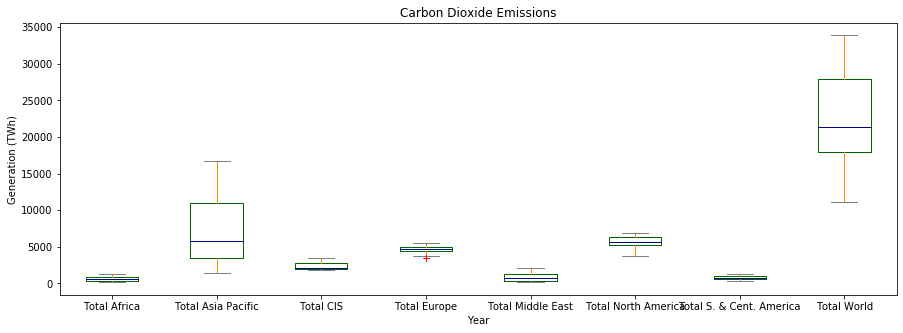

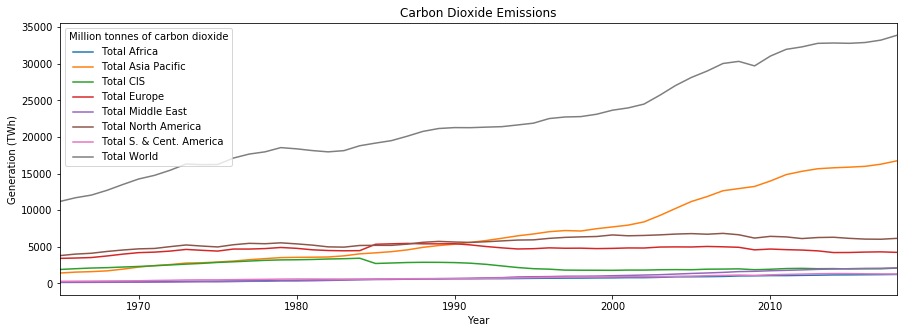

In [28]:
#Plot line chart with the Renew generation by region
df=Total_Carbon.transpose()
df.plot(kind='box', figsize=(15,5), color=color, sym='r+')
plt.title('Carbon Dioxide Emissions')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')

df.plot(kind='line', figsize=(15,5))
plt.title('Carbon Dioxide Emissions')
plt.xlabel('Year')
plt.ylabel('Generation (TWh)')
plt.show()